In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDClassifier
from statsmodels.formula.api import ols

In [10]:
#
artists_df = pd.read_csv('/Users/ray/Documents/申請資料包/Maryland/課程相關/Data Processing and Analysis in Python/Project/SpotGenTrack/Data Sources/spotify_artists.csv')
#
album_df = pd.read_csv('/Users/ray/Documents/申請資料包/Maryland/課程相關/Data Processing and Analysis in Python/Project/SpotGenTrack/Data Sources/spotify_albums.csv')
#
tracks_df=pd.read_csv('/Users/ray/Documents/申請資料包/Maryland/課程相關/Data Processing and Analysis in Python/Project/SpotGenTrack/Data Sources/spotify_tracks.csv')
#
lyrics_df = pd.read_csv('/Users/ray/Documents/申請資料包/Maryland/課程相關/Data Processing and Analysis in Python/Project/SpotGenTrack/Features Extracted/lyrics_features.csv')


In [3]:
extended_df = pd.merge(tracks_df, artists_df, left_on='id', right_on='track_id',suffixes=['_track','_artists'])
extended_df2 = pd.merge(extended_df, lyrics_df, on='track_id')
extended_df3 = pd.merge(extended_df2, album_df, left_on=['album_id','available_markets','track_id'], right_on=['id','available_markets','track_id'])
extended_df4 = pd.merge(extended_df2, album_df, left_on=['album_id','available_markets','track_id'], right_on=['id','available_markets','track_id'])
extended_df5 = pd.merge(extended_df2, album_df, left_on=['album_id','available_markets','track_id'], right_on=['id','available_markets','track_id'])

In [4]:
for i in extended_df3.columns:
        if extended_df3[i].dtype in ['object']:
            extended_df3.pop(i)
print(extended_df3.columns)

Index(['Unnamed: 0_track', 'acousticness', 'danceability', 'disc_number',
       'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'mode', 'popularity', 'speechiness', 'tempo',
       'time_signature', 'track_number', 'valence', 'Unnamed: 0_artists',
       'artist_popularity', 'followers', 'Unnamed: 0_x', 'mean_syllables_word',
       'mean_words_sentence', 'n_sentences', 'n_words', 'sentence_similarity',
       'vocabulary_wealth', 'Unnamed: 0_y', 'total_tracks'],
      dtype='object')


In [5]:
extended_df3=extended_df3.drop(['Unnamed: 0_track','Unnamed: 0_artists','Unnamed: 0_x','Unnamed: 0_y'],axis=1)
extended_df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49242 entries, 0 to 49241
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   acousticness         49242 non-null  float64
 1   danceability         49242 non-null  float64
 2   disc_number          49242 non-null  float64
 3   duration_ms          49242 non-null  float64
 4   energy               49242 non-null  float64
 5   instrumentalness     49242 non-null  float64
 6   key                  49242 non-null  float64
 7   liveness             49242 non-null  float64
 8   loudness             49242 non-null  float64
 9   mode                 49242 non-null  float64
 10  popularity           49242 non-null  float64
 11  speechiness          49242 non-null  float64
 12  tempo                49242 non-null  float64
 13  time_signature       49242 non-null  float64
 14  track_number         49242 non-null  float64
 15  valence              49242 non-null 

In [6]:
corr = extended_df3.corr()

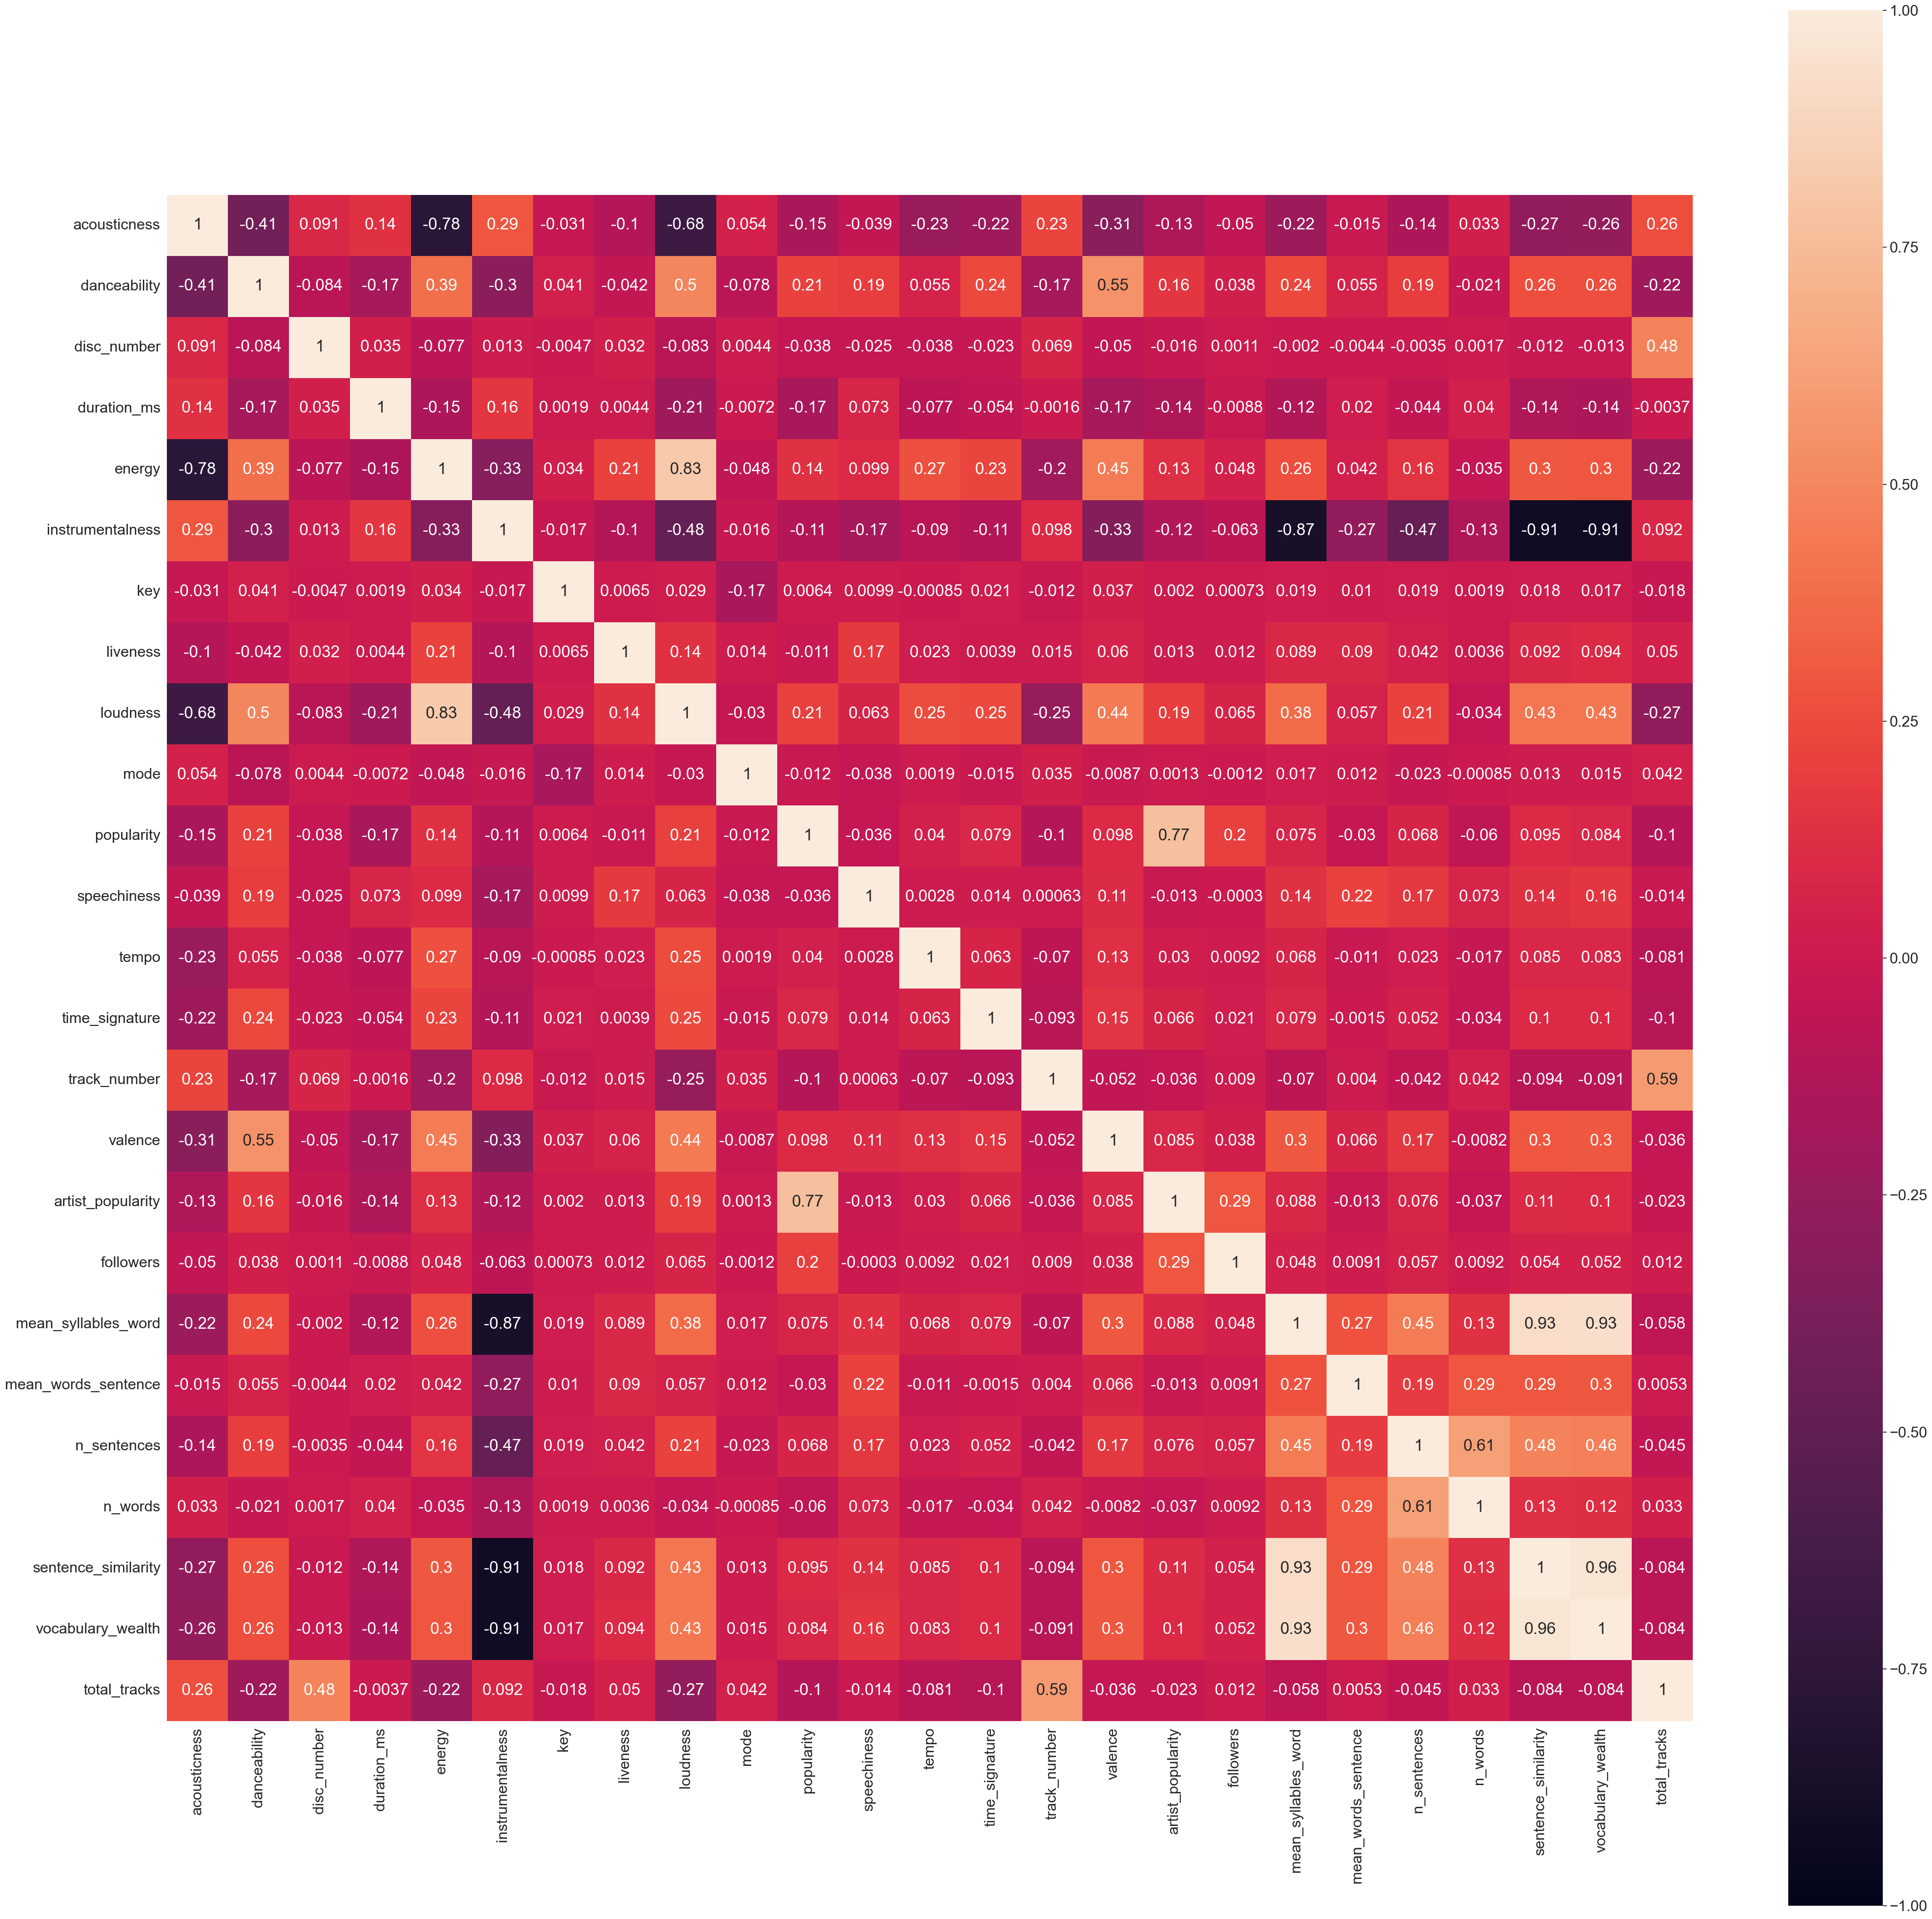

In [7]:
sns.set(rc={'figure.figsize':(50,50)})
sns.set(font_scale=2)
fig = sns.heatmap(corr, vmin=-1, vmax=1, annot=True, square=True)

In [8]:
extended_df5_1=pd.get_dummies(extended_df5[,0:5])

In [ ]:
extended_df5_2=pd.get_dummies(extended_df5[30:])

In [9]:
extended_df5_1

,Unnamed: 0_track,acousticness,danceability,disc_number,duration_ms,energy,instrumentalness,key,liveness,loudness,...,track_name_prev_track_3,track_name_prev_track_42,track_name_prev_track_6,track_name_prev_track_60,uri_y_spotify:album:1bcqsH5UyTBzmh9YizdsBE,uri_y_spotify:album:6HliYi1SE9uMcnJHFVC0oT,uri_y_spotify:album:6VVr09AK8qjO6doYUEzrVj,uri_y_spotify:album:6cflCkqI3e9MHkm7rZlkXA,uri_y_spotify:album:7noNViHJAYZ3UxlhDNKAt9,type_album
0,1,0.8630,0.719,1.0,656960.0,0.308,0.000000,6.0,0.2530,-10.340,...,1,0,0,0,1,0,0,0,0,1
1,10,0.1010,0.748,1.0,237667.0,0.666,0.000653,6.0,0.0976,-6.094,...,0,1,0,0,0,0,0,0,1,1
2,25,0.1910,0.608,1.0,243667.0,0.664,0.042700,5.0,0.1200,-8.261,...,0,0,0,1,0,0,0,1,0,1
3,28,0.6780,0.679,1.0,587465.0,0.247,0.000001,7.0,0.1790,-21.546,...,0,0,0,0,0,0,1,0,0,1
4,35,0.0786,0.470,1.0,157500.0,0.828,0.000000,9.0,0.1780,-6.280,...,0,0,1,0,0,1,0,0,0,1


In [11]:
extended_df5.columns

Index(['Unnamed: 0_track', 'acousticness', 'album_id', 'analysis_url',
       'artists_id', 'available_markets', 'country', 'danceability',
       'disc_number', 'duration_ms', 'energy', 'href_x', 'id_track',
       'instrumentalness', 'key', 'liveness', 'loudness', 'lyrics', 'mode',
       'name_track', 'playlist', 'popularity', 'preview_url', 'speechiness',
       'tempo', 'time_signature', 'track_href', 'track_name_prev_track',
       'track_number', 'uri_x', 'valence', 'type_track', 'Unnamed: 0_artists',
       'artist_popularity', 'followers', 'genres', 'id_artists',
       'name_artists', 'track_id', 'track_name_prev_artists', 'type_artists',
       'Unnamed: 0_x', 'mean_syllables_word', 'mean_words_sentence',
       'n_sentences', 'n_words', 'sentence_similarity', 'vocabulary_wealth',
       'Unnamed: 0_y', 'album_type', 'artist_id', 'external_urls', 'href_y',
       'id', 'images', 'name', 'release_date', 'release_date_precision',
       'total_tracks', 'track_name_prev', 'uri_

In [12]:
len75 = round(0.75*len(extended_df3.index))
print(len75)
len25 = round(0.25*len(extended_df3.index))
print(len25)
print(len75+len25)
print(len(extended_df3.index))

36932
12310
49242
49242


In [116]:
# Create the regressor: reg
reg = LinearRegression()

train = extended_df3[:len75]
test = extended_df3[len75:]

#Fit the model to the data
extended_df3['log_followers'] = np.log(extended_df3['followers'])
extended_df3['log_popularity'] = np.log(extended_df3['popularity'])
extended_df3['log_popularity2'] = (extended_df3['log_popularity']/100)
extended_df3.dropna(inplace=True)
extended_df3.dropna(inplace=True)
print(extended_df3.head())
model1 = ols('followers~acousticness+danceability+instrumentalness+valence+n_sentences+sentence_similarity+popularity', data=extended_df3).fit()

   acousticness  danceability  disc_number  duration_ms  energy  \
0        0.8630         0.719          1.0     656960.0   0.308   
1        0.1010         0.748          1.0     237667.0   0.666   
2        0.1910         0.608          1.0     243667.0   0.664   
3        0.6780         0.679          1.0     587465.0   0.247   
4        0.0786         0.470          1.0     157500.0   0.828   

   instrumentalness  key  liveness  loudness  mode  ...  n_words  \
0          0.000000  6.0    0.2530   -10.340   1.0  ...     5106   
1          0.000653  6.0    0.0976    -6.094   0.0  ...      331   
2          0.042700  5.0    0.1200    -8.261   0.0  ...      333   
3          0.000001  7.0    0.1790   -21.546   1.0  ...     6410   
4          0.000000  9.0    0.1780    -6.280   1.0  ...      195   

   sentence_similarity  vocabulary_wealth  total_tracks  log_followers  \
0             0.000180               0.57            13       7.994632   
1             0.068599               0.5

/Users/ray/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [22]:
print(model1.summary())

#disc_number,+energy,speechiness+vocabulary_wealth++liveness+loudness

                            OLS Regression Results                            
Dep. Variable:              followers   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     325.9
Date:                Sat, 03 Dec 2022   Prob (F-statistic):               0.00
Time:                        13:53:12   Log-Likelihood:            -7.2504e+05
No. Observations:               49242   AIC:                         1.450e+06
Df Residuals:                   49234   BIC:                         1.450e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.628e+05   1

In [88]:
model2 = ols('log_followers~popularity+acousticness+danceability+disc_number+energy+instrumentalness+liveness+loudness+speechiness+valence+n_sentences+sentence_similarity+vocabulary_wealth', data=extended_df3).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:          log_followers   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 05 Dec 2022   Prob (F-statistic):                nan
Time:                        12:15:11   Log-Likelihood:                    nan
No. Observations:               49242   AIC:                               nan
Df Residuals:                   49228   BIC:                               nan
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept                  nan    

/Users/ray/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1687: RuntimeWarning: invalid value encountered in subtract
  return np.sum(weights * (model.endog - mean)**2)


In [125]:
model3 = ols('popularity~followers+disc_number+energy+speechiness+vocabulary_wealth+loudness+acousticness+danceability+instrumentalness+valence+n_sentences+sentence_similarity+duration_ms', data=extended_df3).fit()

In [126]:
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                     520.2
Date:                Mon, 05 Dec 2022   Prob (F-statistic):               0.00
Time:                        21:45:37   Log-Likelihood:            -2.0110e+05
No. Observations:               49076   AIC:                         4.022e+05
Df Residuals:                   49062   BIC:                         4.024e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              43.7473    

In [80]:
model3 = ols('popularity~disc_number+energy+speechiness+vocabulary_wealth+loudness+acousticness+danceability+instrumentalness+valence+n_sentences+sentence_similarity', data=extended_df3).fit()

In [81]:
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     349.0
Date:                Mon, 05 Dec 2022   Prob (F-statistic):               0.00
Time:                        12:12:16   Log-Likelihood:            -2.0351e+05
No. Observations:               49242   AIC:                         4.070e+05
Df Residuals:                   49230   BIC:                         4.072e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              42.3324    

In [38]:
Q1_df = extended_df4[['artist_popularity', 'followers', 'artists_id', 'name_artists']]
print(Q1_df.tail(20))

       artist_popularity  followers  \
49222                 49       2928   
49223                 65     219429   
49224                 65      47750   
49225                 62      27672   
49226                 73    1332882   
49227                 63     203025   
49228                 64      56226   
49229                 59      51130   
49230                 58      63962   
49231                  1         37   
49232                 37       1198   
49233                  1          0   
49234                 31       1357   
49235                 52      26892   
49236                 87    4294004   
49237                 16        585   
49238                 47      59326   
49239                 44      33923   
49240                 63     552438   
49241                 62     212731   

                                              artists_id      name_artists  
49222  ['550Zxz0BTZi3yd8gX9QINw', '31lnFZEM6ysvjOx59V...           iLL BLU  
49223  ['550Zxz0BTZi3yd8gX

In [39]:
final_df = Q1_df.sort_values(by=['followers'], ascending= False)
print(final_df.tail(20))
final_df = final_df.reset_index(drop=True)


       artist_popularity  followers  \
19380                 10          0   
43228                  6          0   
4258                   9          0   
21407                  2          0   
18025                  0          0   
18026                  0          0   
10692                 15          0   
30133                  8          0   
3667                   6          0   
9682                  16          0   
48145                 12          0   
5407                   7          0   
20414                 11          0   
27577                  0          0   
20415                 18          0   
27568                  0          0   
27567                  0          0   
21405                  3          0   
21404                  2          0   
31651                  3          0   

                                              artists_id          name_artists  
19380  ['5afO60iXGsbd29HmRsedRv', '0wCaw9Fbno4HRUcdFd...      Catherine Hubert  
43228  ['5goS0v24F

In [40]:
number = len(final_df.index)//4
print(number)

12310


In [41]:
top_25 = final_df.head(number)
print(top_25.shape)

print(top_25.tail(20))
print(top_25['artist_popularity'].min(), top_25['artist_popularity'].max())

(12310, 4)
       artist_popularity  followers  \
12290                 36      16603   
12291                 41      16599   
12292                 36      16582   
12293                 41      16582   
12294                 51      16582   
12295                 36      16572   
12296                 43      16571   
12297                 46      16569   
12298                 43      16567   
12299                 42      16566   
12300                 42      16565   
12301                 66      16564   
12302                 45      16563   
12303                 40      16554   
12304                 50      16550   
12305                 52      16544   
12306                 54      16542   
12307                 41      16536   
12308                 35      16534   
12309                 33      16533   

                                              artists_id          name_artists  
12290  ['0qEO82Hj3SvjoNyEfKpRku', '3XBVboDYG3geSCMAT6...  Krzysztof Penderecki  
12291  

In [44]:
df = Q1_df.groupby('artist_popularity').agg({'artist_popularity':'max', 'followers':'min'})[['followers','artist_popularity']].reset_index()
print(df.head(20))

print(top_25.sort_values(by = ['artist_popularity'], ascending = False))


ValueError: cannot insert artist_popularity, already exists

In [45]:
import seaborn as sns

<AxesSubplot:xlabel='artist_popularity', ylabel='followers'>

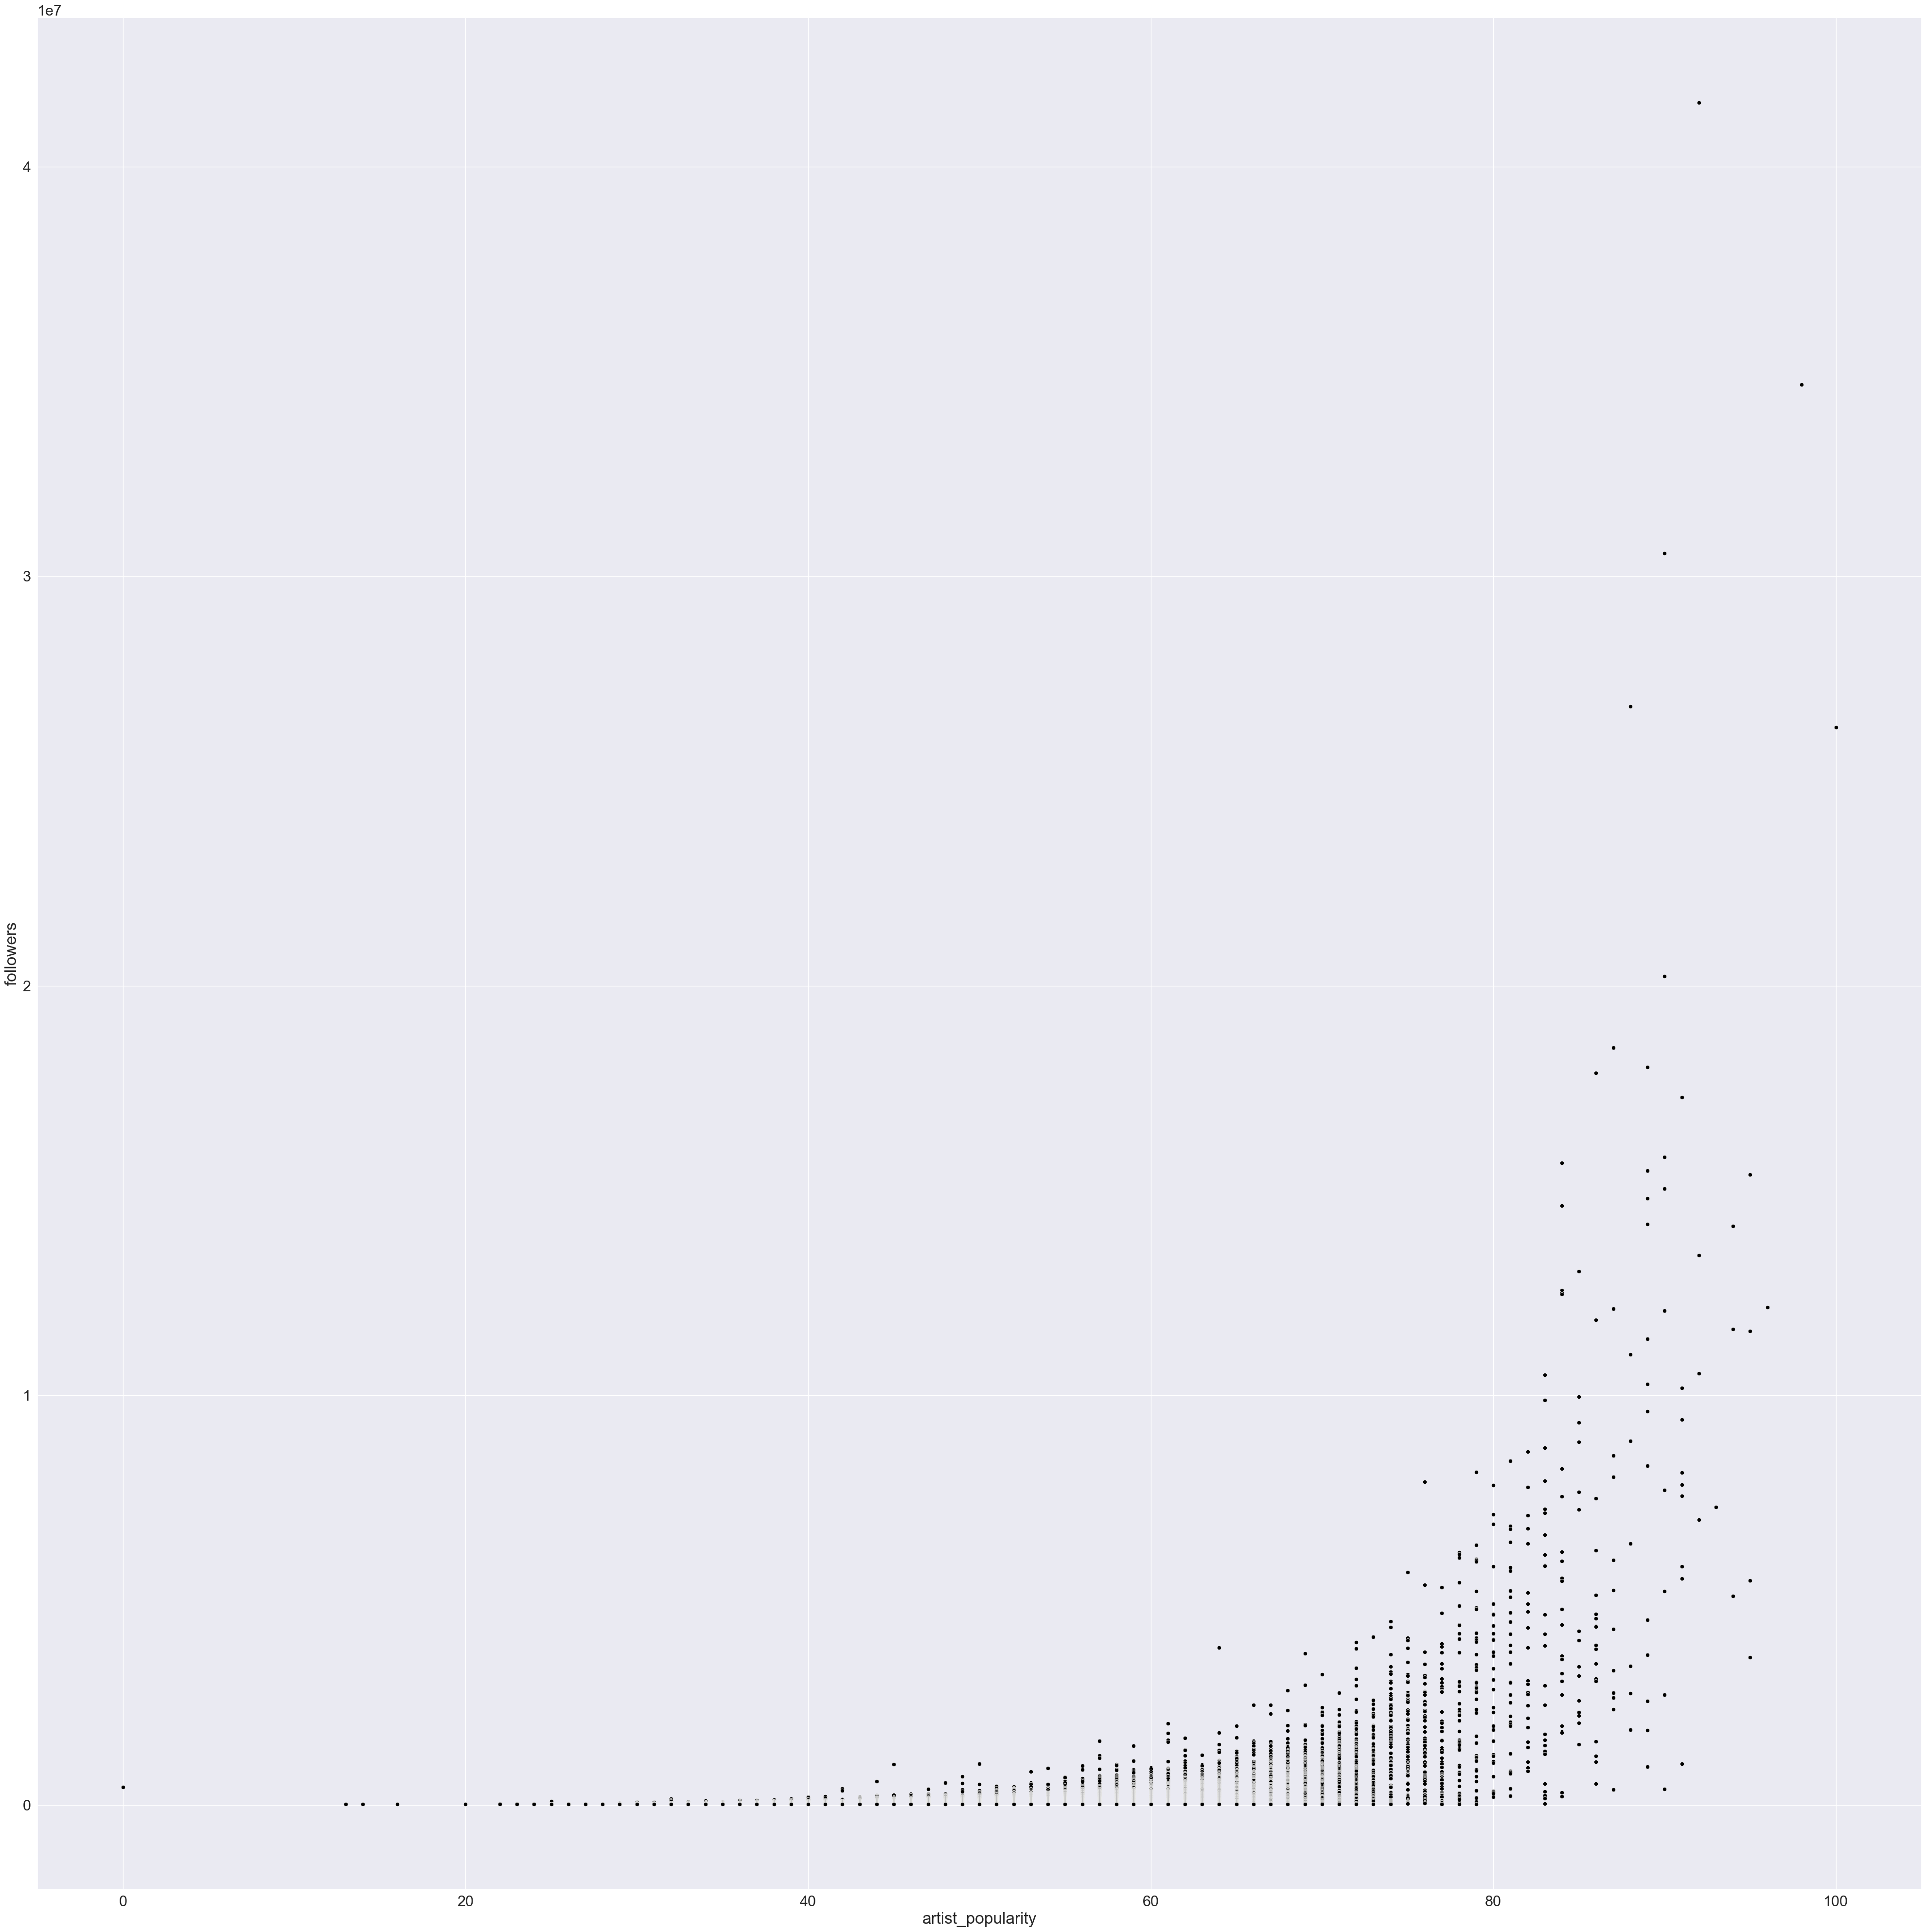

In [69]:
sns.scatterplot(top_25, y = top_25['followers'], x = top_25['artist_popularity'], color='black')

In [47]:
num_b10 = len(top_25.index)//10
top_25_bottom_10 = top_25.sort_values(by = ['followers'], ascending = False).tail(num_b10)

print(top_25_bottom_10)

       artist_popularity  followers  \
11079                 40      21000   
11080                 52      20993   
11081                 45      20992   
11082                 50      20988   
11083                 36      20976   
...                  ...        ...   
12305                 52      16544   
12306                 54      16542   
12307                 41      16536   
12308                 35      16534   
12309                 33      16533   

                                              artists_id   name_artists  
11079                         ['1u2U27ckhq5LxPzOy3ZHoa']  Franco Simone  
11080                         ['3Wcyta3gkOdQ4TfY0WyZpu']         YONAKA  
11081  ['1zHcoqaTvlZdEd7CUjk2eI', '0wygiZev26irRopIBG...        ANARCHY  
11082  ['5CkVLGKUJkIc1pmSk10QP4', '6TshTCYwh9ySzOO6Jy...      Eli & Fur  
11083                         ['4zZpzWYJaB1flhTV6UueQq']          Hevia  
...                                                  ...            ...  
12305        

In [48]:
df_70_pop = top_25[(top_25['artist_popularity']>70)]
print(df_70_pop.shape)


(915, 4)


<AxesSubplot:xlabel='followers', ylabel='artist_popularity'>

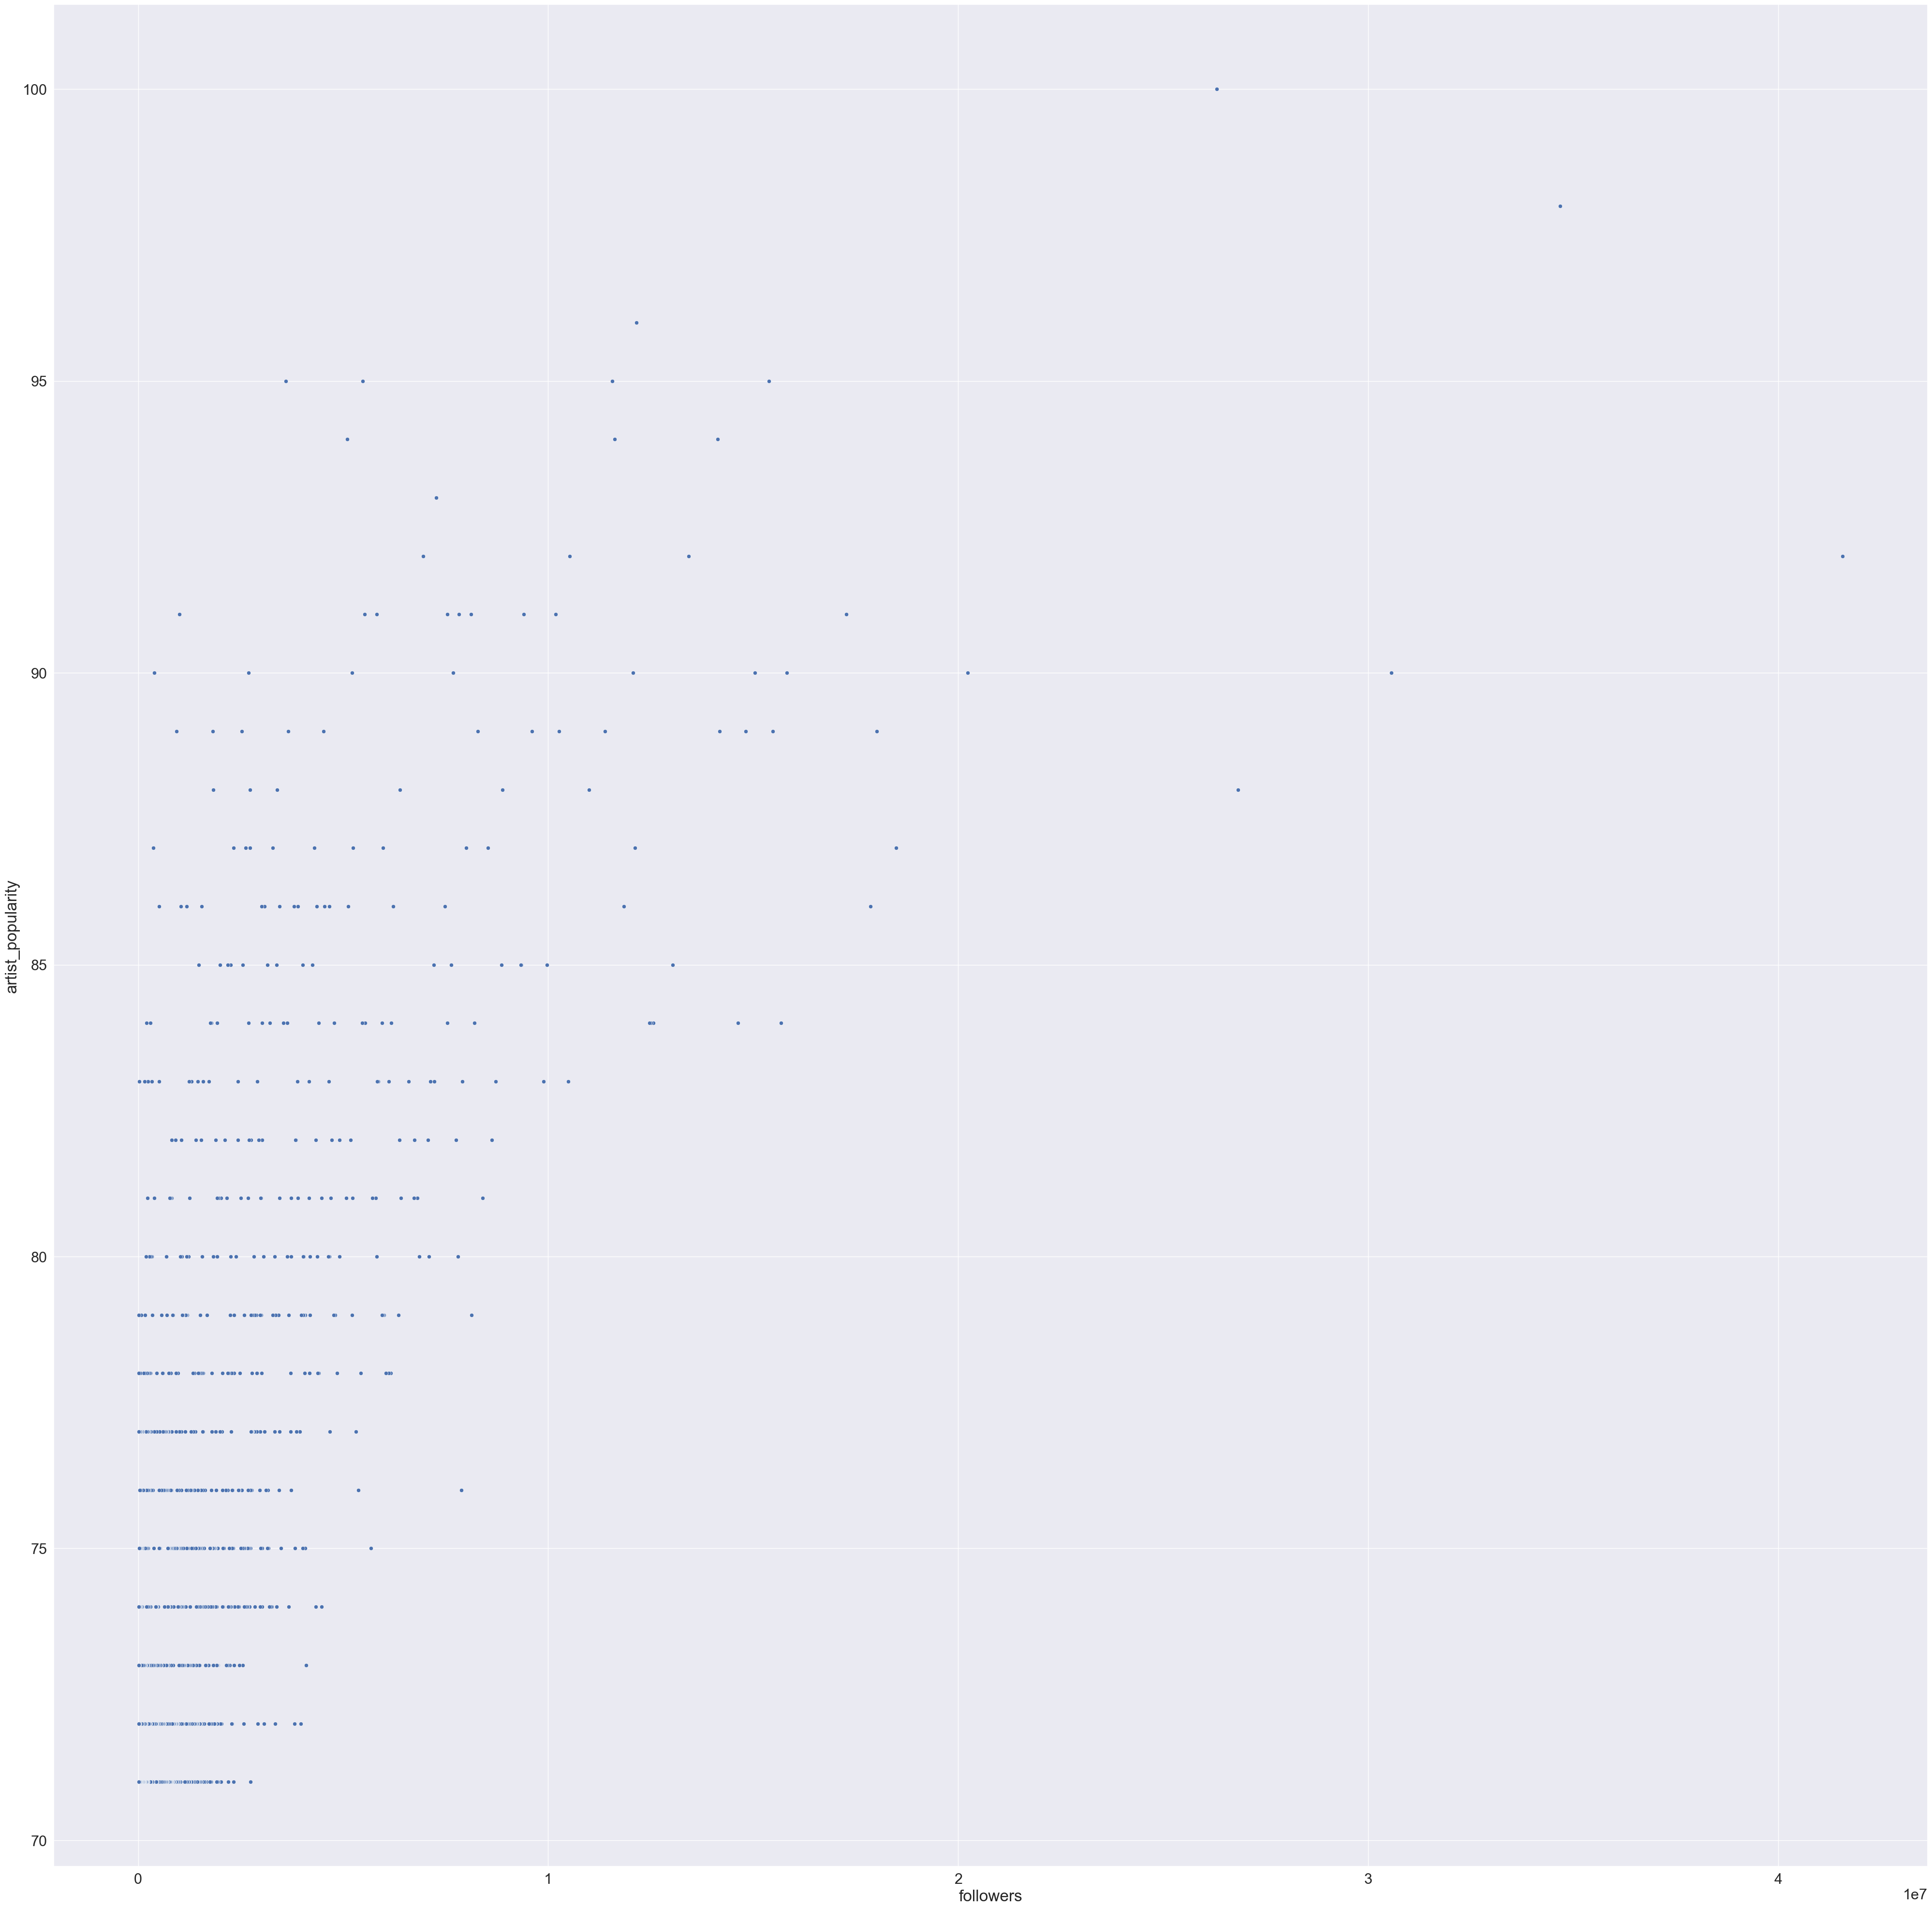

In [49]:
sns.scatterplot(df_70_pop, x = df_70_pop['followers'], y = df_70_pop['artist_popularity'])

In [50]:
df_90_2 = pd.DataFrame(top_25[(top_25['artist_popularity'].isin([70,71,72,73,74,75])) & (top_25['followers']<=2000000)])

print(df_90_2.sort_values(by = ['followers'], ascending = False))

       artist_popularity  followers  \
352                   71    1949186   
353                   73    1946175   
354                   75    1946036   
356                   71    1945004   
357                   73    1944936   
...                  ...        ...   
10709                 72      22669   
10992                 74      21323   
11072                 71      21018   
11358                 70      19921   
11943                 73      17804   

                                              artists_id  \
352                           ['6ZLTlhejhndI4Rh53vYhrY']   
353    ['2RJBv9wXbW6m539q9NOfW1', '7CUFPNi1TU8RowpnFR...   
354                           ['0rvjqX7ttXeg3mTy8Xscbt']   
356                           ['6cnl6Jz97730GUS8zEAK77']   
357                           ['40Yq4vzPs9VNUrIBG5Jr2i']   
...                                                  ...   
10709  ['4LcUpNlXFEleaLlelmkv2R', '5vmwWgrlwCfHm1P0vd...   
10992  ['2o5jDhtHVPhrJdv3cEQ99Z', '5vQfv3s2Z2SRdPZK

In [51]:
df_90_2 = pd.DataFrame( Q1_df[  (Q1_df['artist_popularity'].isin(range(80,85)) )  &  ( Q1_df['followers']>=500000) & ( Q1_df['followers']<=1500000) ])
print(df_90_2.shape)

(17, 4)


In [60]:
df_90_2.sort_values(['followers'])

,artist_popularity,followers,artists_id,name_artists
48835,83,517207,"['2X97ZAqRKRMYFIDqtvGgGc', '6M2wZ9GZgrQXHCFfjv...",Mark Ronson
39354,80,694601,"['39KEQQAG9JhIt71g9NEVhh', '2otUckChxWf2cp6UP2...",Azet
44652,81,770646,"['5WUlDfRSoLAfcVSX1WnrxN', '5fMUXHkw8R8eOP2RNV...",Labrinth
41630,81,797986,"['0Dvx6p8JDyzeOPGmaCIH1L', '0b62itBWBdLgiecXjX...",Bonez MC
42107,82,820362,['2wkoKEfS6dXwThbyTnZWFU'],Mau y Ricky
47708,81,820377,"['3drqpTL4sQOckmAfF9i1wg', '0Dvx6p8JDyzeOPGmaC...",RAF Camora
40625,82,908762,"['7CajNmpbOovFoOoasH2HaY', '4f9iBmdUOhQWeP7dcA...",Rag'n'Bone Man
47646,80,1029594,['718COspgdWOnwOFpJHRZHS'],Luke Combs
40280,82,1055925,"['2CgysNw5B7rFNRtRjQbPZ9', '3MZsBdqDrRTJihTHQr...",Joji
45147,80,1064343,['7DMveApC7UnC2NPfPvlHSU'],Cheat Codes


In [55]:
df_90_3 = pd.DataFrame( Q1_df[  (Q1_df['artist_popularity'].isin(range(85,90)) )  &  ( Q1_df['followers']>=500000) & ( Q1_df['followers']<=1500000) ])
print(df_90_3.shape)
df_90_3.sort_values(['followers'])

(5, 4)


,artist_popularity,followers,artists_id,name_artists
38699,86,517489,['1cNDP5yjU5vjeR8qMf4grg'],YNW Melly
36637,89,934306,['2hlmm7s2ICUX0LVIhVFlZQ'],Gunna
42307,86,1047552,['5JZ7CnR6gTvEMKX4g70Amv'],Lauv
38525,86,1187681,"['4DdkRBBYG6Yk9Ka8tdJ9BW', '0iEtIxbK0KxaSlF7G4...",Metro Boomin
46980,85,1475817,"['5LHRHt1k9lMyONurDHEdrp', '02kJSzxNuaWGqwubyU...",Rich The Kid


In [56]:
df_90_4 = pd.DataFrame( Q1_df[  (Q1_df['artist_popularity'].isin(range(90,95)) )  &  ( Q1_df['followers']>=500000) & ( Q1_df['followers']<=1500000) ])
print(df_90_4.shape)
df_90_4.sort_values(['followers'])

(1, 4)


,artist_popularity,followers,artists_id,name_artists
49091,91,1007821,"['0NIIxcxNHmOoyBx03SfTCD', '4DdkRBBYG6Yk9Ka8td...",Offset


In [58]:
df_90_4 = pd.DataFrame( Q1_df[  (Q1_df['artist_popularity'].isin(range(95,100)) )  &  ( Q1_df['followers']>=1500000) & ( Q1_df['followers']<=3000000) ])
print(df_90_4.shape)
df_90_4.sort_values(['followers'])

(0, 4)


,artist_popularity,followers,artists_id,name_artists


In [101]:
import statsmodels.formula.api as smf

In [119]:
model5 = smf.logit('log_popularity2~acousticness+danceability+instrumentalness+valence+n_sentences+sentence_similarity+followers', data =extended_df3 ).fit()
# print out the summary results of the fitted model.
print(model5.summary())

Optimization terminated successfully.
         Current function value: 0.044861
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:        log_popularity2   No. Observations:                49076
Model:                          Logit   Df Residuals:                    49068
Method:                           MLE   Df Model:                            7
Date:                Mon, 05 Dec 2022   Pseudo R-squ.:                     inf
Time:                        16:09:52   Log-Likelihood:                -2201.6
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -3.3702      0.107    -31.541      0.000      -3.580      -3.161
ac

/Users/ray/opt/anaconda3/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:3511: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.llf/self.llnull


In [120]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [121]:
Q2_df = pd.DataFrame(extended_df5[['genres', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'tempo', 'liveness', 'loudness', 'speechiness', 'duration_ms', 'popularity']])

Q2_df['ls_len'] = Q2_df['genres'].str.len()
print(Q2_df.shape)
Q2_df = Q2_df[Q2_df.ls_len != 2]
print(Q2_df.shape)

uni_val = len(pd.unique(Q2_df['genres']))
pd.unique(Q2_df['genres'])

alt_q2_df = Q2_df.head(10)

print(Q2_df['genres'].value_counts())

def clean(a):
    a.replace('[', '')
    a.replace(']', '')
    a.replace("'", '')
    a.replace('-', '')
    return a
    
def clean_(b):
    b = b.split(',')
    return b

(49242, 12)
(29201, 12)
['focus']                                                                                                                                  171
['chillhop', 'lo-fi beats']                                                                                                                 93
['classical piano']                                                                                                                         84
['orchestra']                                                                                                                               74
['dutch hip hop']                                                                                                                           70
                                                                                                                                          ... 
['crunk', 'dirty south rap', 'gangster rap', 'hip hop', 'hip pop', 'miami hip hop', 'pop rap', 'rap', 'southern hip ho

In [122]:
Q2_df['genres_'] = Q2_df['genres'].apply(clean(), axis=1)
Q2_df['genres_'] = Q2_df['genres'].apply(clean(), axis=1)

genres_words = []

for i in Q2_df['genres']:
    i = i.replace('[', '')
    i=i.replace(']', '')
    i=i.replace("'", '')
    i=i.replace('-', '')
    i=i.split(',')
    genres_words.append(i)

flat_genres_words = []

for j in genres_words:
    for k in j:
        flat_genres_words.append(k)

Q2_df['genres_words'] = genres_words


print(Q2_df.head(20))

TypeError: clean() missing 1 required positional argument: 'a'

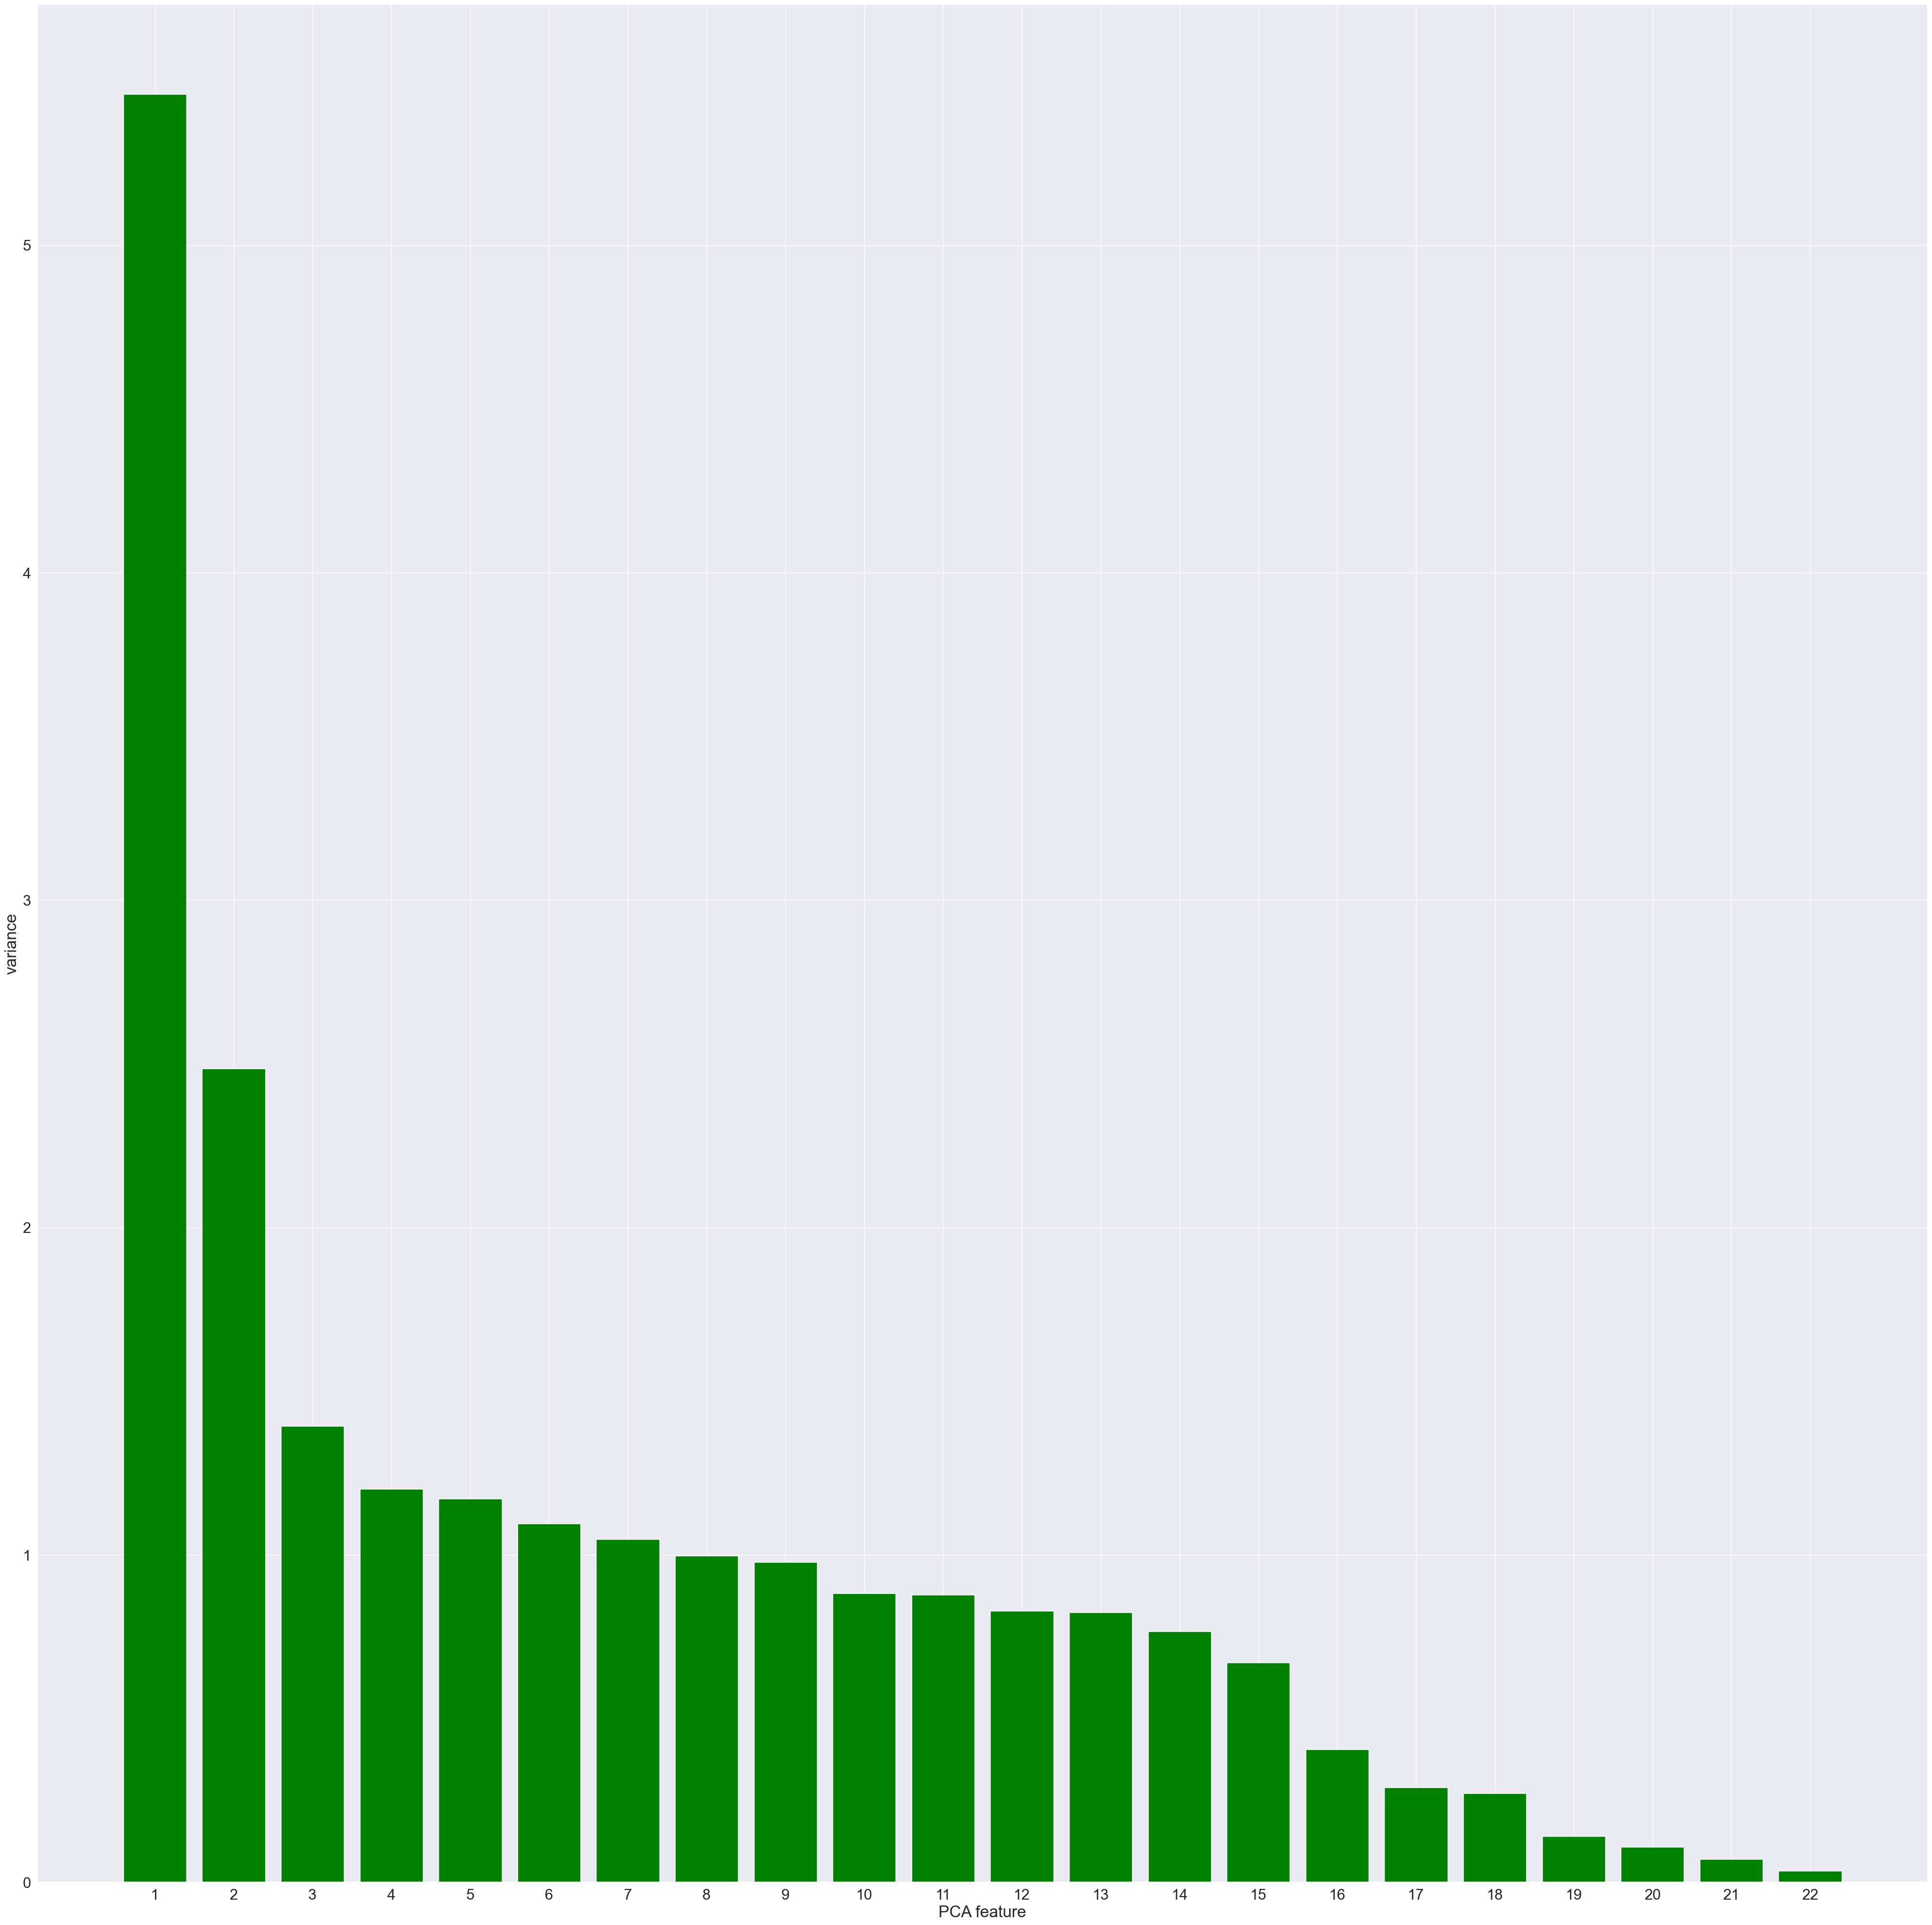

In [131]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

drop_master_df = ['Unnamed: 0_track','album_id','analysis_url','artists_id','available_markets',
                  'country','href_x','id_track','name_track','playlist','preview_url','track_href',
                  'track_name_prev_track','uri_x','type_track','genres','id_artists','name_artists',
                  'track_id','track_name_prev_artists','type_artists','Unnamed: 0_x','Unnamed: 0_y',
                  'album_type','artist_id','external_urls','href_y','id','images','name','release_date',
                  'release_date_precision','total_tracks','track_name_prev','uri_y','type', 'lyrics',
                  'Unnamed: 0_artists', 'artist_popularity', 'popularity']

Q4_df = extended_df5.drop(drop_master_df, axis = 1)

scaler_try = StandardScaler()
pca_try = PCA()

pipeline = make_pipeline(scaler_try, pca_try)

# Fit the pipeline to 'samples'
pipeline.fit(Q4_df)

# Plot the explained variances
features = range(1, 1 + pca_try.n_components_)
plt.bar(features,pca_try.explained_variance_, color='green' )
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

In [146]:
from sklearn import preprocessing
scaled_extended = preprocessing.scale(Q4_df)

# Create a PCA model with 2 components: pca
pca = PCA(n_components=2)

# Fit the PCA instance to the scaled samples
pca.fit(scaled_extended)

# Transform the scaled samples: pca_features
pca_features = pca.transform(scaled_extended)

print(pca_features.shape)




(49242, 2)


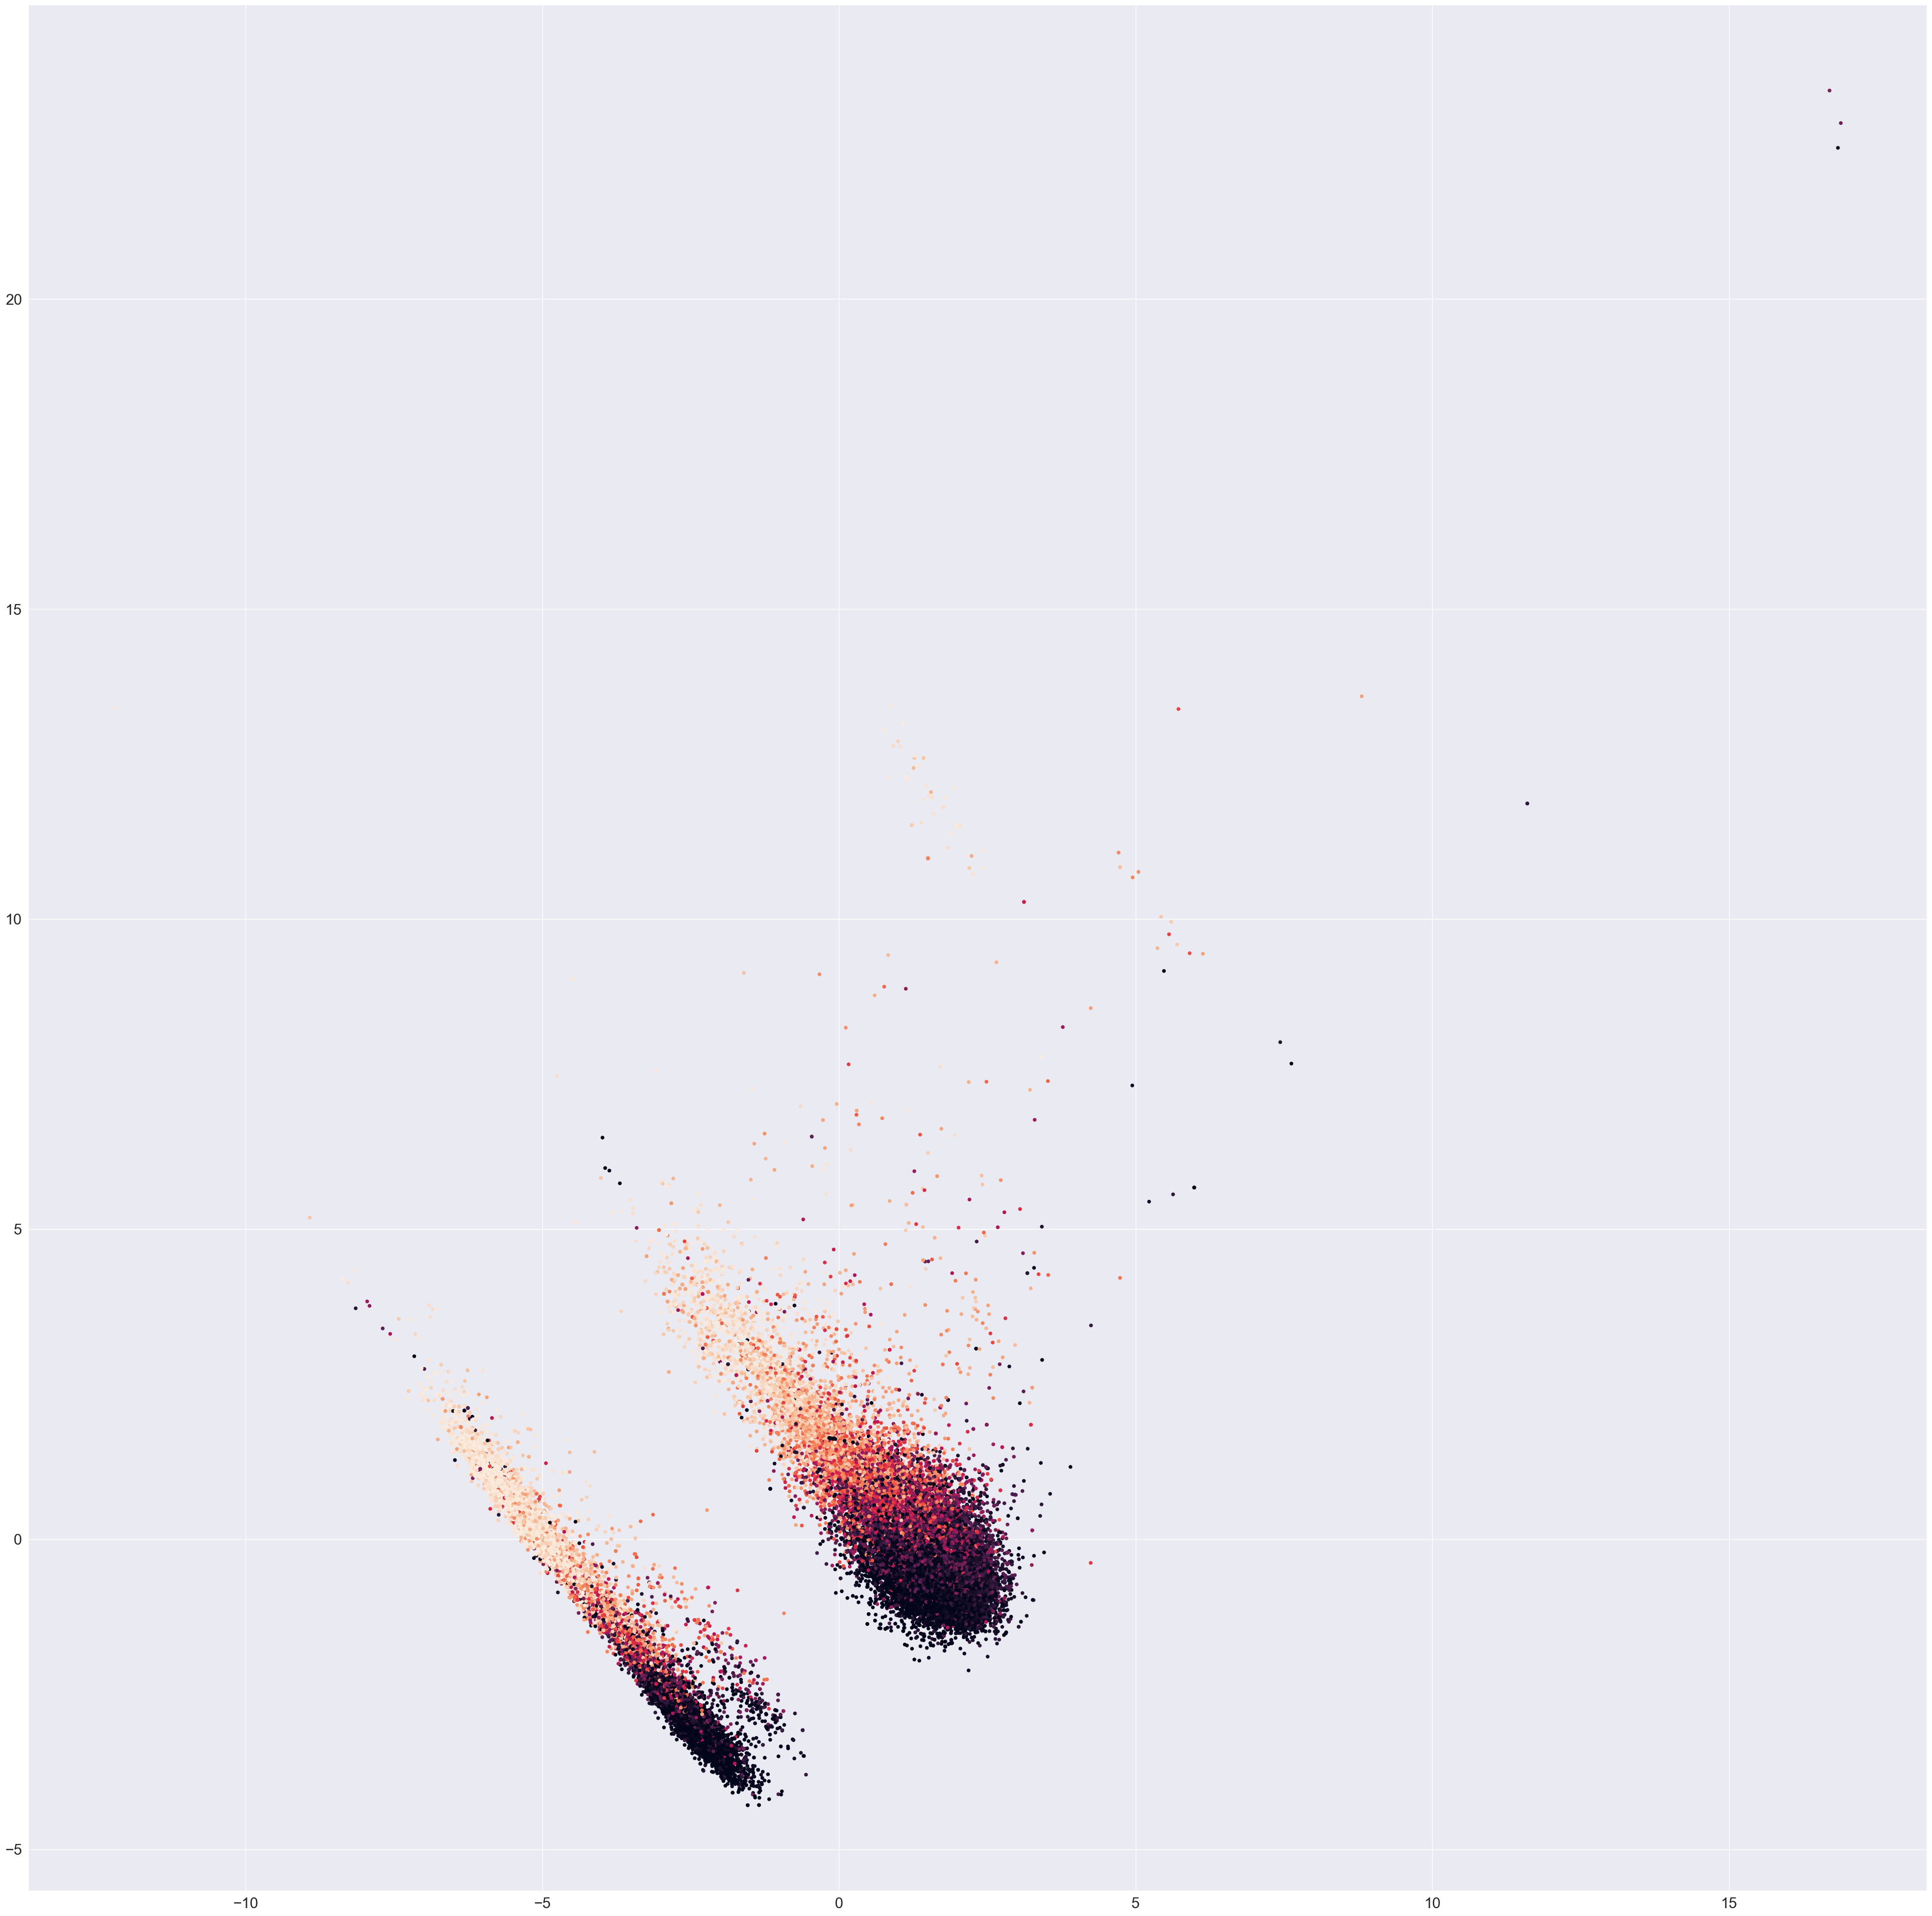

In [148]:
music_feature = Q4_df.iloc[:,0].replace({'A':0, 'B':1, 'C':3, 'D':4, 'E':5}).values

# plot the fish data in 2 dimensions using PCA features
plt.scatter(pca_features[:,0], pca_features[:,1],c=music_feature, s=20)

In [1]:
for i in extended_df3.columns:
        if i.dtype()== 'string':
            print(i)
            extented_df3.iloc[:,i].drop

NameError: name 'extended_df3' is not defined